# Complex Step in few steps...
**Prof Joseph Morlier, ISAE-SUPAERO**


The idea is simple and dates from 1967 [1]. Recent work in multidisciplinary optimization [1] has revived the interest of this method (sensitivity calculation). It is in fact a development of Taylor in the case where $F$ (the function to be derived) is analytic with real values.
Let $F(z)$ be a function and $x_0$ a real, Taylor development of $F(z)$ gives:

$$
F\left(x_0+i h\right)=F\left(x_0\right)+i h F^{\prime}\left(x_0\right)-h^2 F^{\prime \prime}\left(x_0\right) / 2!-i h^3 F^{(3)} / 3!+\ldots
$$

...by taking imaginary part (dividing by $h$ ), it comes:

$$
F^{\prime}\left(x_0\right)=I m\left(F\left(x_0+i h\right)\right) / h+O\left(h^2\right)
$$


Evaluate $F$ with a complex argument $x_0+i h$, dividing by $h$, gives the derivative $F\left(x_0\right)$ with an order of precision $O\left(h^2\right)$. Let's take $h=10^{-8}$, the approximation error of $F\left(x_0\right)$ is the same than rounded error.



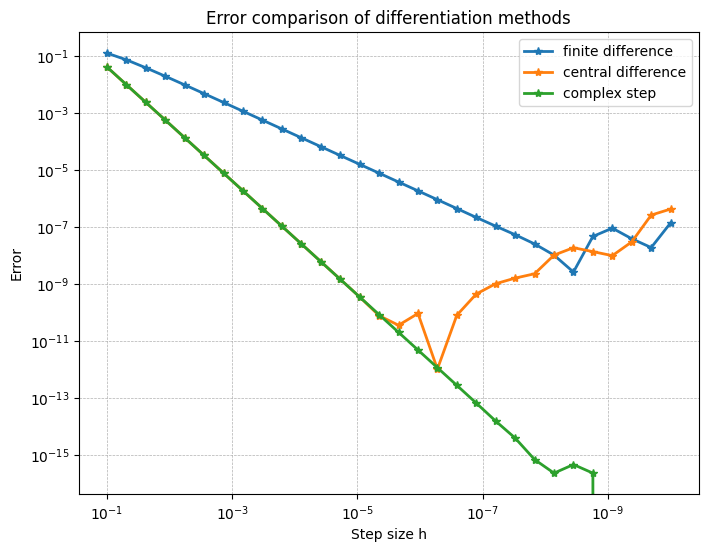

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define the function
def f(x):
    return np.sin(3*x) * np.log(x)

# Symbolic differentiation using sympy
x_sym = sp.Symbol('x')
f_sym = sp.sin(3*x_sym) * sp.log(x_sym)
dfdx_sym = ?

# Convert symbolic derivative to a numerical function
dfdx_numeric = sp.lambdify(x_sym, dfdx_sym, 'numpy')

# Point of evaluation
x0 = 0.7

# Step sizes (logarithmically spaced)
H = np.logspace(-1, -10, 30)

# Initialize error arrays
errs_fd = []
errs_cd = []
errs_cm = []

# Compute derivative using different methods
dfdx_a = dfdx_numeric(x0)  # Analytical derivative

for h in H:
    # Finite difference
    dfdx_fd = (f(x0) - f(x0 - h)) / h

    # Central difference
    dfdx_cd = ?

    # Complex step method
    dfdx_cm = ?

    # Compute errors
    errs_fd.append(abs(dfdx_fd - dfdx_a))
    errs_cd.append(abs(dfdx_cd - dfdx_a))
    errs_cm.append(abs(dfdx_cm - dfdx_a))

# Plot the errors
plt.figure(figsize=(8, 6))
plt.loglog(H, errs_fd, '-*', label="finite difference", linewidth=2)
plt.loglog(H, errs_cd, '-*', label="central difference", linewidth=2)
plt.loglog(H, errs_cm, '-*', label="complex step", linewidth=2)

plt.gca().invert_xaxis()
plt.xlabel('Step size h')
plt.ylabel('Error')
plt.legend(loc="upper right")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.title("Error comparison of differentiation methods")
plt.show()

The complex step method is always more accurate than the finite difference method of order 1 (normal!). The method of centered differences (of order 2) begins to diverge more quickly (towards 10 ^ -6) than the method complex step (10 ^ -8)

**References**

[1] Lyness, James N., and Moler, Cleve B., Numerical Differentiation of Analytic Functions, SIAM J. Numerical Analysis 4, 1967, pp. 202-210.  epubs.siam.org/doi/abs/10.1137/0704019

[2] Martins, Joaquim R. R. A., A Guide to the Complex-Step Derivative Approximation, complex step guide

Online https://blogs.mathworks.com/cleve/2013/10/14/complex-step-differentiation/